In [34]:
from os import listdir
from matplotlib import image
import random
import numpy as np 
from dataclasses import dataclass

# load all images in a directory
random.seed(9)
random_indexes = random.sample(range(25000), 250)
loaded_images = list()
for i in range(250):
	filename = 'im' + str(random_indexes[i]) + '.jpg'
	img_data = image.imread('mirflickr25k/mirflickr/' + filename)
	loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))

> loaded im15171.jpg (375, 500, 3)
> loaded im20093.jpg (318, 500, 3)
> loaded im12232.jpg (429, 500, 3)
> loaded im8753.jpg (337, 500, 3)
> loaded im4539.jpg (333, 500, 3)
> loaded im6099.jpg (375, 500, 3)
> loaded im22172.jpg (500, 375, 3)
> loaded im210.jpg (500, 322, 3)
> loaded im11086.jpg (375, 500, 3)
> loaded im16475.jpg (376, 500, 3)
> loaded im15195.jpg (333, 500, 3)
> loaded im19814.jpg (375, 500, 3)
> loaded im2648.jpg (333, 500, 3)
> loaded im10945.jpg (333, 500, 3)
> loaded im18162.jpg (335, 500, 3)
> loaded im20206.jpg (500, 385, 3)
> loaded im22940.jpg (375, 500, 3)
> loaded im1340.jpg (386, 500, 3)
> loaded im23861.jpg (500, 375, 3)
> loaded im12419.jpg (334, 500, 3)
> loaded im5551.jpg (375, 500, 3)
> loaded im23051.jpg (332, 500, 3)
> loaded im14811.jpg (500, 375, 3)
> loaded im23758.jpg (500, 375, 3)
> loaded im13847.jpg (358, 500, 3)
> loaded im5149.jpg (240, 320, 3)
> loaded im5519.jpg (375, 500, 3)
> loaded im7799.jpg (500, 500, 3)
> loaded im1682.jpg (334, 500, 

In [35]:
values = np.zeros((3, 256))
index = 0
for image in loaded_images:
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			values[0][image[i][j][0]] += 1
			values[1][image[i][j][1]] += 1
			values[2][image[i][j][2]] += 1
	index += 1
	if (index % 10) == 0:
		print('> processed %i files' % (index))

> processed 10 files
> processed 20 files
> processed 30 files
> processed 40 files
> processed 50 files
> processed 60 files
> processed 70 files
> processed 80 files
> processed 90 files
> processed 100 files
> processed 110 files
> processed 120 files
> processed 130 files
> processed 140 files
> processed 150 files
> processed 160 files
> processed 170 files
> processed 180 files
> processed 190 files
> processed 200 files
> processed 210 files
> processed 220 files
> processed 230 files
> processed 240 files
> processed 250 files


In [36]:
RED = 0
GREEN = 1
BLUE = 2
#1 task
print('Red: ', end='')
for i in range(255, 0, -1):
    if (values[RED][i] != 0):
        print('Max - {}, '.format(i), end='')
        break
for i in range(0, 255):
    if (values[RED][i] != 0):
        print('Min - {}'.format(i))
        break

print('Green: ', end='')
for i in range(255, 0, -1):
    if (values[GREEN][i] != 0):
        print('Max - {}, '.format(i), end='')
        break
for i in range(0, 255):
    if (values[GREEN][i] != 0):
        print('Min - {}'.format(i))
        break

print('Blue: ', end='')
for i in range(255, 0, -1):
    if (values[BLUE][i] != 0):
        print('Max - {}, '.format(i), end='')
        break
for i in range(0, 255):
    if (values[BLUE][i] != 0):
        print('Min - {}'.format(i))
        break

Red: Max - 255, Min - 0
Green: Max - 255, Min - 0
Blue: Max - 255, Min - 0


In [37]:
# expected value and dispersion
# RED
sum_val = sum(values[RED])
M_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    M_red += p * index
D_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    D_red += p * ((index - M_red) ** 2)
print("Red: expected value (math. ochikuvanya) : {0:.2f}, dispersion : {1:.2f}"\
.format(M_red, D_red))

#GREEN
sum_val = sum(values[GREEN])
M_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    M_green += p * index
D_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    D_green += p * ((index - M_green) ** 2)
print("Green: expected value (math. ochikuvanya) : {0:.2f}, dispersion : {1:.2f}"\
.format(M_green, D_green))
    
#BLUE
sum_val = sum(values[BLUE])
M_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    M_blue += p * index
D_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    D_blue += p * ((index - M_blue) ** 2)
print("Blue: expected value (math. ochikuvanya) : {0:.2f}, dispersion : {1:.2f}"\
.format(M_blue, D_blue))

Red: expected value (math. ochikuvanya) : 110.96, dispersion : 5971.28
Green: expected value (math. ochikuvanya) : 101.85, dispersion : 5362.33
Blue: expected value (math. ochikuvanya) : 90.83, dispersion : 5764.33


In [38]:
#Median and interquartal 

def medianFinder(array_values):
    sum_val = sum(array_values)
    summa = 0
    for index in range(len(array_values)):
        summa += array_values[index]
        if (summa > (sum_val / 2)):
            return index - 1
        if (summa == (sum_val / 2)):
            return (2 * index + 1) / 2

def quartFinder(array_values, quart):
    sum_val = sum(array_values)
    summa = 0
    for index in range(len(array_values)):
        prev_sum = summa
        p = array_values[index] /  sum_val
        summa += p
        if (summa > quart):
            if (quart - prev_sum < summa - quart):
                return index - 1
            elif (quart - prev_sum > summa - quart):
                return index
            else:
                return (2 * index - 1) / 2

#RED
print('Red: median - {0}, interquartal - {1}'.format(medianFinder(values[RED]),\
quartFinder(values[RED], 0.75) - quartFinder(values[RED], 0.25)))
print('Green: median - {0}, interquartal - {1}'.format(medianFinder(values[GREEN]),\
quartFinder(values[GREEN], 0.75) - quartFinder(values[GREEN], 0.25)))
print('Blue: median - {0}, interquartal - {1}'.format(medianFinder(values[BLUE]),\
quartFinder(values[BLUE], 0.75) - quartFinder(values[BLUE], 0.25)))

Red: median - 105, interquartal - 131
Green: median - 94, interquartal - 120
Blue: median - 73, interquartal - 124


In [39]:
def E_operator(arr_values, M, power):
    sum_val = sum(arr_values)
    ans = 0
    for index in range(len(arr_values)):
        p = (arr_values[index] / sum_val)
        ans += p * ((index - M) ** power)
    return ans
        
#asymmetry, ekscess
Asym_red = E_operator(values[RED], M_red, 3) / (D_red ** (3 / 2))
Asym_green = E_operator(values[GREEN], M_green, 3) / (D_green ** (3 / 2))
Asym_blue = E_operator(values[BLUE], M_blue, 3) / (D_blue ** (3 / 2))

Ekscess_red = E_operator(values[RED], M_red, 4) / (D_red ** 2)
Ekscess_green = E_operator(values[GREEN], M_green, 4) / (D_green ** 2)
Ekscess_blue = E_operator(values[BLUE], M_blue, 4) / (D_blue ** 2)
print('Red: asymmetry - {0:.3f}, ekscess - {1:.3f}'\
.format(Asym_red, Ekscess_red))
print('Green: asymmetry - {0:.3f}, ekscess - {1:.3f}'\
.format(Asym_green, Ekscess_green))
print('Blue: asymmetry - {0:.3f}, ekscess - {1:.3f}'\
.format(Asym_blue, Ekscess_blue))

Red: asymmetry - 0.213, ekscess - 1.859
Green: asymmetry - 0.343, ekscess - 2.033
Blue: asymmetry - 0.582, ekscess - 2.160


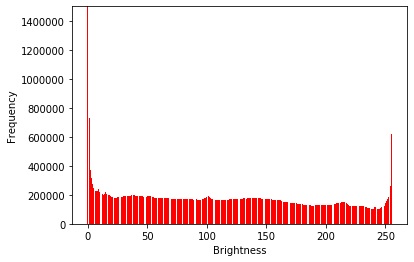

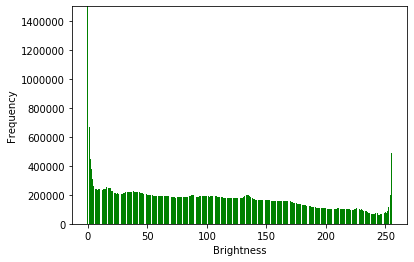

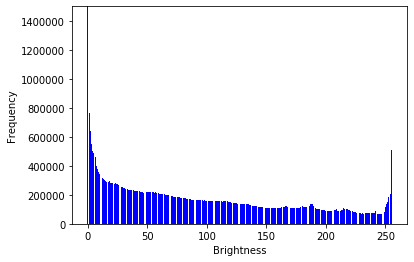

In [40]:
import matplotlib.pyplot as plt

x = range(256)

#RED
plt.bar(x,values[RED],color='red')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.ylim(top=1500000)
plt.show()
#GREEN
plt.bar(x,values[GREEN],color='green')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.ylim(top=1500000)
plt.show()
#BLUE
plt.bar(x,values[BLUE],color='blue')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.ylim(top=1500000)
plt.show()